# Imbalanced Datasets and Data Sampling

# Data-Level Methods: Under-Sampling, Over-sampling & Hybrid

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss
from imblearn.ensemble import BalancedRandomForestClassifier
from collections import Counter
from sklearn.linear_model import LogisticRegression

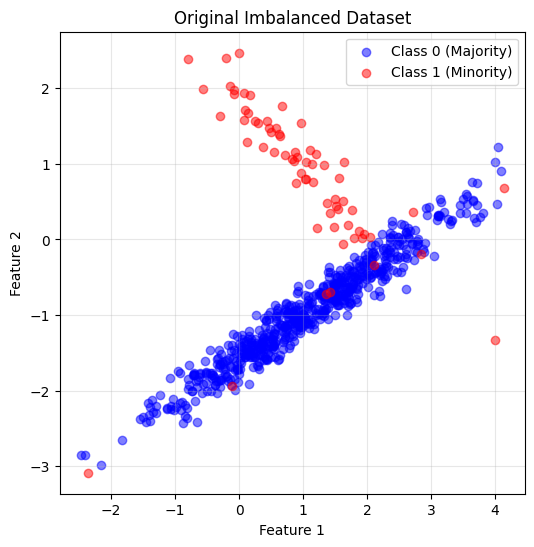

Class distribution: Counter({np.int64(0): 632, np.int64(1): 68})
Class 0: 632 samples (90.29%)
Class 1: 68 samples (9.71%)
--------------------------------------------------


In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Plot dataset
def plot_data(X, y, title):
    """Plot data points with different colors for each class"""
    plt.figure(figsize=(6, 6))
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0 (Majority)', alpha=0.5, color='blue')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1 (Minority)', alpha=0.5, color='red')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Print class distribution
    counter = Counter(y)
    print(f"Class distribution: {counter}")
    for label, count in counter.items():
        print(f"Class {label}: {count} samples ({count/len(y)*100:.2f}%)")
    print("-" * 50)

# Create imbalanced dataset
X, y = make_classification(
        n_samples=1000,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_clusters_per_class=1,
        weights=(0.9, 0.1),
        random_state=42
    )
# split the date into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plot original data
plot_data(X_train, y_train, "Original Imbalanced Dataset")


## 1. Random Over-sampling

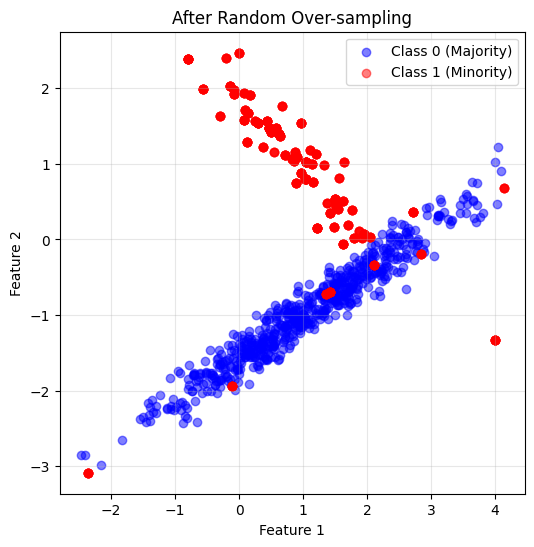

Class distribution: Counter({np.int64(0): 632, np.int64(1): 632})
Class 0: 632 samples (50.00%)
Class 1: 632 samples (50.00%)
--------------------------------------------------


In [4]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
plot_data(X_ros, y_ros, "After Random Over-sampling")

## 2. Random Under-sampling

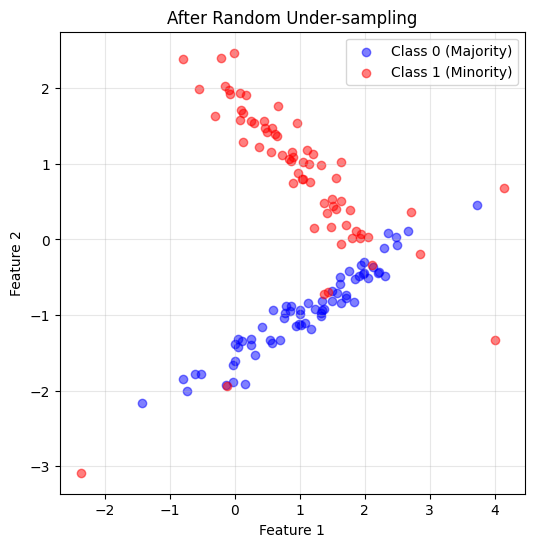

Class distribution: Counter({np.int64(0): 68, np.int64(1): 68})
Class 0: 68 samples (50.00%)
Class 1: 68 samples (50.00%)
--------------------------------------------------


In [5]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
plot_data(X_rus, y_rus, "After Random Under-sampling")

## 3. SMOTE (Synthetic Minority Over-sampling Technique)

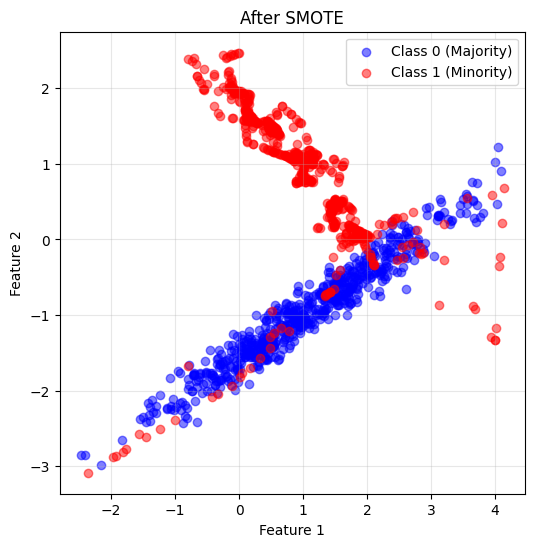

Class distribution: Counter({np.int64(0): 632, np.int64(1): 632})
Class 0: 632 samples (50.00%)
Class 1: 632 samples (50.00%)
--------------------------------------------------


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
plot_data(X_smote, y_smote, "After SMOTE")


## 4. Tomek Links

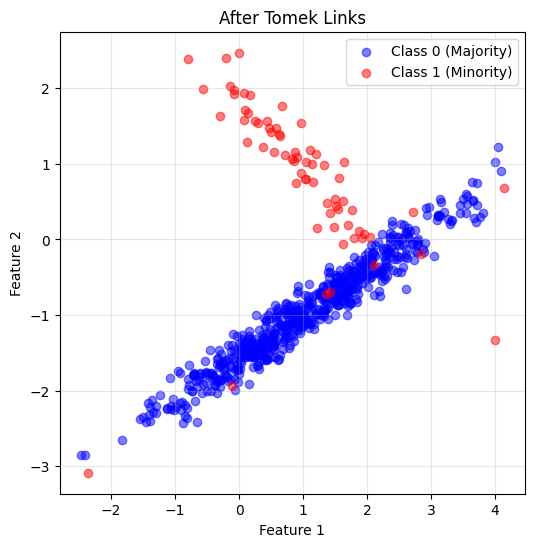

Class distribution: Counter({np.int64(0): 627, np.int64(1): 68})
Class 0: 627 samples (90.22%)
Class 1: 68 samples (9.78%)
--------------------------------------------------


In [ ]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_train, y_train)
plot_data(X_tl, y_tl, "After Tomek Links")

## 5. SMOTE + Tomek Links

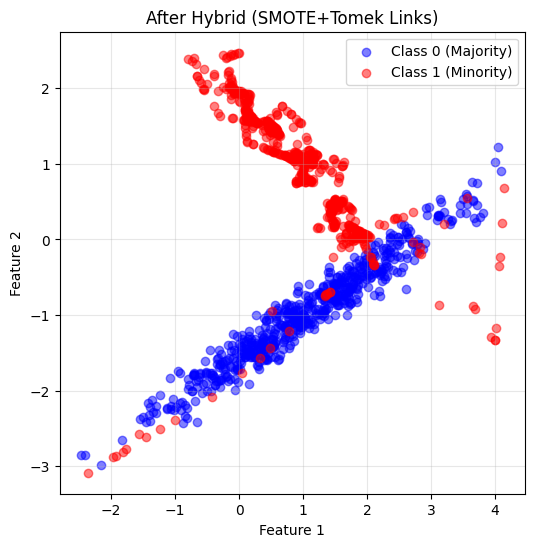

Class distribution: Counter({np.int64(0): 608, np.int64(1): 608})
Class 0: 608 samples (50.00%)
Class 1: 608 samples (50.00%)
--------------------------------------------------


In [8]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
smote = SMOTE(random_state=42)
tl = TomekLinks(sampling_strategy="all")
X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_smote_tl, y_smote_tl = tl.fit_resample(X_smote, y_smote)
plot_data(X_smote_tl, y_smote_tl, "After Hybrid (SMOTE+Tomek Links)")

## 6. SMOTETomek

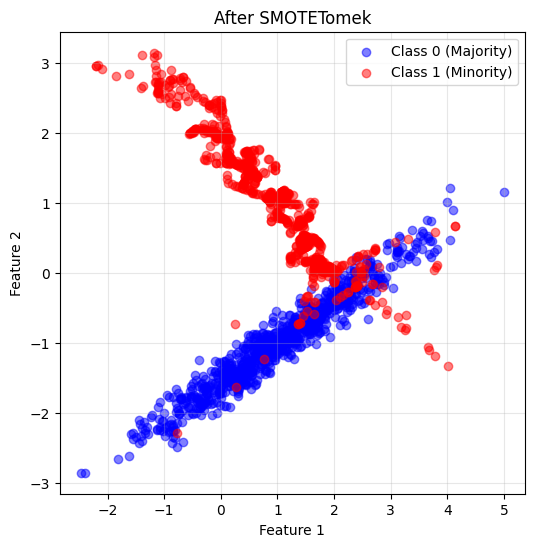

Class distribution: Counter({np.int64(0): 865, np.int64(1): 865})
Class 0: 865 samples (50.00%)
Class 1: 865 samples (50.00%)
--------------------------------------------------


In [9]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X_stom, y_stom = smt.fit_resample(X, y)
plot_data(X_stom, y_stom, "After SMOTETomek")